# Production version of python rad transfer code

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage.filters import gaussian_filter1d
from hapi import *
import pandas as pd

from matplotlib.font_manager import FontProperties
from scipy.interpolate import CubicSpline

%run simulate_radiances_utils.py
%run locations.py


font = {'weight' : 'bold',
        'size'   : 12}
label_fontdict = {'weight' : 'bold',
        'size'   : 12}
title_fontdict = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [12]:
reanlaysis_vars_subset = ['PS','PL','QV','T', 'DELP']

In [13]:
loc_label = 'summit'


In [14]:
save_figs_rel_dir = '/home/cchristo/proj_christian/rad_transfer_python/figs/'

In [16]:
input_cs_matrix_rel_path = '/net/fluo/data2/groupMembers/cchristo/cs_matrices/' + loc_label + '/'
reanalysis_dir = '/net/fluo/data2/groupMembers/cchristo/reanalysis_3d/merra2/2015/'
file_type = '*.nc'
profile_ts_file_path = "/net/fluo/data2/groupMembers/cchristo/profiles/summit_merra/summit_all.nc"


all_file_paths_cs_matrix = [y for x in os.walk(input_cs_matrix_rel_path) for y in glob(os.path.join(x[0], file_type))]
all_file_paths_reanalysis = [y for x in os.walk(reanalysis_dir) for y in glob(os.path.join(x[0], '*.nc4'))]

In [17]:
dss = xr.open_dataset(all_file_paths_reanalysis[0])

In [658]:
# plt.imshow(dss['CLOUD'].values

# Open reanlysis data

In [315]:


# ds_3d = xr.open_mfdataset(all_file_paths_reanalysis, 
#                           combine='by_coords')[reanlaysis_vars_subset]

In [8]:
# ds_3d.isel(time = 56)
# ds_3d_seasonal = ds_3d.groupby('time.season').mean()

In [356]:
loc_lat =  loc_lat_lon_map[loc_label][0] #72.5796
loc_lon = loc_lat_lon_map[loc_label][1] #-38.4588
time_ii = 63

ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
# select single time
# ds_single = ds_single.isel(time = time_ii)
# time_i = ds_single.time

# seasonal mea 
ds_seasonal = ds_single.groupby('time.season').mean('time')

ds_single.load()
p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)

# print(time_i)

NameError: name 'ds_3d' is not defined

In [29]:
# ds_single.

In [23]:
%%time
# ds_seasonal.load()
# ds_single

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 10.7 µs


In [603]:
# Load saved profile & get properties
ds_seasonal = xr.open_dataset('/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/profile_djf_week.nc')
p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_seasonal, verbose=False)



In [12]:
# plt.plot(T_prof)

In [32]:
season_i = 0
ds_seasonal.isel(season = season_i)
p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_seasonal.isel(season = season_i), verbose=False)



In [14]:
# save seasonal profile
# ds_seasonal.isel(season = season_i).to_netcdf('/export/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/profile_djf_week.nc')


In [14]:
for seas_i in ds_seasonal.season:
    plot_ds = ds_seasonal.sel(season = seas_i)
    p_prof, T_prof = plot_ds['PL'].values, plot_ds['T'].values
    plot_profile(p_prof, T_prof, min_pres=1e4, label=seas_i.values,
                 newfig_bool = False)
    plt.legend()

NameError: name 'ds_seasonal' is not defined

In [15]:
# def interpolate_profile(p_prof, 
#                         var_prof, 
#                         p_interp_grid, 
#                         method = 'CubicSpline',
#                         return_interp_obj = False):
#     '''
#     Interpolate profile to given pressure grid. 
    
#     Args
#     -----
#     p_prof - np.array
#         pressure profile 
#     var_prof - np.array
#         profile of variable to interpolate
#     method - str {'CubicSpline',}
#         interpolation method to use
        
#     return_interp_obj - bool
#         if True, return scipy.interpolate object along with profile
        
        
#     Returns
#     -------
#     (p_interp_grid, var_prof_interpolated) - Profile interpolated to p_interp_grid
    
#     '''
    
#     if method == 'CubicSpline':
#         spline_obj = CubicSpline(p_prof, var_prof)
#         var_prof_interpolated = spline_obj(p_interp_grid)
        
#     if return_interp_obj:
#         return (p_interp_grid, var_prof_interpolated, spline_obj)
#     else:
#         return (p_interp_grid, var_prof_interpolated)

In [16]:
p_interp_grid = np.linspace(1e3, p_prof.max(), 300)
# p_interp_grid = np.logspace(1e3, p_prof.max(), 200)
res = interpolate_profile(p_prof, T_prof, p_interp_grid)

NameError: name 'np' is not defined

In [17]:
# res[1]
# plt.plot(p_interp_grid , '.')
# p_interp_grid

In [18]:
# p_interp_grid
# plot_profile(*res , min_pres = 6e3)

# Open saved cross sections

In [7]:
input_cs_matrix_path_format = input_cs_matrix_rel_path + '{year}/{month:02d}/cs_matrix_{year}{month:02d}{day:02d}_{hour:02d}{minute:02d}.nc'
input_cs_matrix_path = input_cs_matrix_path_format.format(year = time_i['time.year'].item(), 
                                                             month = time_i['time.month'].item(), 
                                                             day = time_i['time.day'].item(),
                                                             hour = time_i['time.hour'].item(), 
                                                             minute = time_i['time.minute'].item())
cs_matrix_ds = xr.open_dataset(input_cs_matrix_path)

# cs_matrix_ds = xr.open_mfdataset(all_file_paths_cs_matrix, combine = 'by_coords')
# cs_matrix_ds = cs_matrix_ds.sel(time = time_i)



NameError: name 'time_i' is not defined

# Create new cross section matrix

In [17]:
%%capture
xmin = 400
# Maximum wavenumber
xmax = 2100
# Actually downloading the data 
# (we have to know the HITRAN molecule numbers, given in http://hitran.org/docs/molec-meta/)
fetch('H2O_S',1,1,xmin,xmax)
fetch('CO2_S',2,1,xmin,xmax)
fetch('CH4_S',6,1,xmin,xmax)

# Let us hust get line position nu and line strength sw for the different molecules:
nu_H2O,sw_H2O = getColumns('H2O_S',['nu','sw'])
nu_CH4,sw_CH4 = getColumns('CH4_S',['nu','sw'])
nu_CO2,sw_CO2 = getColumns('CO2_S',['nu','sw'])


In [18]:
%%time
cs_matrix_ds = create_cross_section_matrix_hapi(p_prof, T_prof, 
                                     xmin, xmax, 
                                     time_i = ds_seasonal.isel(season = season_i)['season'],
                                     output_path=None)

CPU times: user 44min 44s, sys: 16.2 s, total: 45min
Wall time: 44min 59s


In [20]:
# cs_matrix_ds

In [18]:
# cs_matrix_ds.to_netcdf('/export/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week.nc')
# !ls
cs_matrix_ds = xr.open_dataset('/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week.nc')
cs_matrix_ds_julia = xr.open_dataset('/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week_julia.nc')

In [19]:
cs_matrix_co2_julia = cs_matrix_ds_julia['cs_matrix_co2'].values
cs_matrix_ch4_julia = cs_matrix_ds_julia['cs_matrix_ch4'].values
cs_matrix_h2o_julia = cs_matrix_ds_julia['cs_matrix_h2o'].values

In [605]:

cs_matrix_co2 = cs_matrix_ds['cs_matrix_co2'].values
cs_matrix_ch4 = cs_matrix_ds['cs_matrix_ch4'].values
cs_matrix_h2o = cs_matrix_ds['cs_matrix_h2o'].values

nu_ = cs_matrix_ds['nu'].values
NLEV = len(cs_matrix_ds['pressure'])

In [362]:
# cs_matrix_ds['cs_matrix_co2'].values

(20000.0, 40000.0)

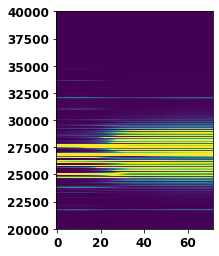

In [379]:
# nu_ = np.append(nu_, 2100.0)

# plt.imshow(cs_matrix_co2_julia, vmax = 10**-20)
# plt.gca().set_aspect(0.0005)
plt.figure()
plt.imshow(cs_matrix_co2, vmax = 10**-19)
# plt.gca().set_aspect(0.0005)
plt.gca().set_aspect(0.005)
plt.ylim([20000, 40000])
# nu_.shape

In [609]:
diff.max()

1.2841448450706321e-17

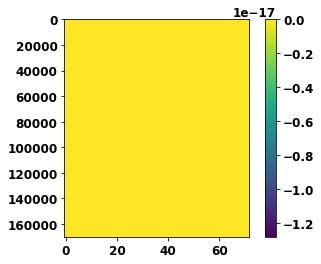

In [619]:
diff =  cs_matrix_co2 - cs_matrix_co2_julia 
plt.imshow(diff, vmax= -1e-30)
plt.gca().set_aspect(0.0005)
plt.colorbar()

# Compute pdf of downwelling radiation for each time 

In [28]:
Rdown, T = compute_downwelling_radiation(cs_matrix_co2, 
                                         cs_matrix_h2o, 
                                         cs_matrix_ch4, 
                                         T_prof,
                                         VCD_dry_prof, 
                                         vmr_h2o_prof,
                                         nu_)

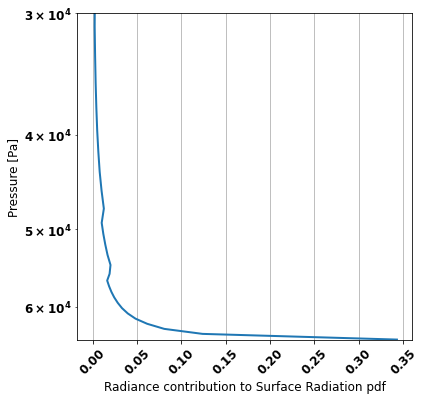

In [29]:
Rdown_pdf =  Rdown.sum(axis =0)
Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
plot_profile(p_prof, Rdown_pdf, min_pres = 3e4, 
             xlabel = 'Radiance contribution to Surface Radiation pdf',
             rotation = 45)

In [27]:
# for time_ii in range(8):
for time_ii in range(57, 57 + 8):
    ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
    ds_single = ds_single.isel(time = time_ii)
    time_i = ds_single.time
    ds_single.load()
    p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)
    ts = pd.to_datetime(str(time_i.values)) 
    d = ts.strftime('%H:%M')
    #######
    input_cs_matrix_path = input_cs_matrix_path_format.format(year = time_i['time.year'].item(), 
                                                             month = time_i['time.month'].item(), 
                                                             day = time_i['time.day'].item(),
                                                             hour = time_i['time.hour'].item(), 
                                                             minute = time_i['time.minute'].item())
    cs_matrix_ds = xr.open_dataset(input_cs_matrix_path)
    
    cs_matrix_co2 = cs_matrix_ds['cs_matrix_co2'].values
    cs_matrix_ch4 = cs_matrix_ds['cs_matrix_ch4'].values
    cs_matrix_h2o = cs_matrix_ds['cs_matrix_h2o'].values

    nu_ = cs_matrix_ds['nu']
    NLEV = len(cs_matrix_ds['pressure'])
    #########
    Rdown, T = compute_downwelling_radiation(cs_matrix_co2, 
                                         cs_matrix_h2o, 
                                         cs_matrix_ch4, 
                                         T_prof,
                                         VCD_dry_prof, 
                                         vmr_h2o_prof,
                                         nu_)
    
    Rdown_pdf =  Rdown.sum(axis =0)
    Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
    ax = plot_profile(p_prof, Rdown_pdf, 
                 newfig_bool = False, 
                 min_pres = 3e4, 
                 xlim = [1e-4, 1],
                 xlabel = 'Radiance contribution to Surface Radiation',
                 label = d)
    ax.set_xscale('log')
    ax.set_title('Summit Greenland Surface Radiation Contributions ' + ts.strftime('%d-%m-%y'))
plt.legend()
# plt.savefig(save_figs_rel_dir + 'surface_rad_contribution/' + 'summit_7_01.png', dpi = 300)

NameError: name 'ds_3d' is not defined

<Figure size 432x288 with 0 Axes>

In [28]:
save_figs_rel_dir

'/home/cchristo/proj_christian/rad_transfer_python/figs/'

In [29]:
# for time_ii in range(8):
for time_ii in range(56, 56 + 8):
    ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
    ds_single = ds_single.isel(time = time_ii)
    time_i = ds_single.time
    ds_single.load()
    p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)
    ts = pd.to_datetime(str(time_i.values)) 
    d = ts.strftime('%H:%M')
    ax = plot_profile(p_prof,  T_prof, # rho_N_h2o_prof,
                 newfig_bool = False, 
                 min_pres = 3e4, 
#                  min_pres = 5.5e4,
                 xlabel = 'Temperature',
                 label = d)
#     ax.set_title('Summit Greenland H2O Mixing Ratio ' + ts.strftime('%d-%m-%y'))
    ax.set_title('Summit Greenland Temperature ' + ts.strftime('%d-%m-%y'))
plt.legend()
plt.ylabel('Pressure [Pa]')
plt.xlim([240, 270])
# plt.savefig(save_figs_rel_dir + 'profiles/' + 'summit_temp_7_15.png', dpi = 300)
# plt.savefig(save_figs_rel_dir + 'profiles/' + 'summit_h2o_mixing_7_15.png', dpi = 300)

NameError: name 'ds_3d' is not defined

In [328]:
# plt.plot(VCD_dry_prof[::-1]*dz_prof[::-1])

In [329]:
# plt.plot(p_prof[::-1], '*-')

In [330]:
# plt.plot(dz_prof[::-1], '*-')

In [333]:
# plt.plot(T_prof[::-1])
# tau_co2.shape
VCD_dry_prof = VCD_dry_prof[::-1]

# Look at single profile

In [620]:
AMF = 1
# Compute transmission for each layer:
T = np.zeros((len(nu_),NLEV))
# Generate matrices of optical thickness per layer now for each gas: 
tau_co2 = cs_matrix_co2*VCD_dry_prof*400.e-6*AMF 
tau_co2_pre = cs_matrix_co2*VCD_dry_prof*270.e-6*AMF
#VCD_h2o = dz*rho_N_h2o
tau_h2o = cs_matrix_h2o*VCD_dry_prof*vmr_h2o_prof*AMF 
tau_ch4 = cs_matrix_ch4*VCD_dry_prof*1.8e-6*AMF 

## Compute Transmissions For Each Layer

In [621]:
T = np.exp(-tau_co2)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
T_pre = np.exp(-tau_co2_pre)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
# TdCO2 = np.exp(-2*tau_co2)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
# TdH2O = np.exp(-tau_co2)*np.exp(-2*tau_h2o)*np.exp(-tau_ch4)
# TdCH4 = np.exp(-tau_co2)*np.exp(-tau_h2o)*np.exp(-2*tau_ch4)

T_CO2 = np.exp(-tau_co2)
T_H2O = np.exp(-tau_h2o)
T_CH4 = np.exp(-tau_ch4)

In [309]:
# VCD_dry_prof

## Generate Planck curve per layer

In [622]:
# Generate Planck curve per layer + surface:
wl_nu = 1.e7/nu_*1.e-9
wavenum_m = nu_*1e2
# Use skin temperature of 300K
# B_surf = planck(wl_nu,300)
# B = np.zeros((len(nu_),NLEV))
B = np.zeros(T.shape)
for i in range(NLEV):
#     B[:,i] = planck(wl_nu,T_prof[i])
    B[:,i] = planck_wavenumber(wavenum_m,T_prof[i])*1e2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculate Downwelling Radiation

In [623]:
Rdown = np.zeros((len(nu_),NLEV))
Rdown_pre = np.zeros((len(nu_),NLEV))
# Rdown_dCO2 = np.zeros((len(nu_),NLEV))
# Rdown_dCH4 = np.zeros((len(nu_),NLEV))
# Rdown_dH2O = np.zeros((len(nu_),NLEV))
Rdown_CO2 = np.empty_like(Rdown)
Rdown_CH4 = np.empty_like(Rdown)
Rdown_H2O = np.empty_like(Rdown)

for i in range(NLEV):
    Rdown[:,i] = B[:,i]*(1-T[:,i])*np.prod(T[:,i+1:],axis=1)
    Rdown_pre[:,i] = B[:,i]*(1-T_pre[:,i])*np.prod(T_pre[:,i+1:],axis=1)
#     Rdown_dCO2[:,i] = B[:,i]*(1-TdCO2[:,i])*np.prod(TdCO2[:,i+1:],axis=1)
#     Rdown_dCH4[:,i] = B[:,i]*(1-TdCH4[:,i])*np.prod(TdCH4[:,i+1:],axis=1)
#     Rdown_dH2O[:,i] = B[:,i]*(1-TdH2O[:,i])*np.prod(TdH2O[:,i+1:],axis=1)

    Rdown_CO2[:,i] = B[:,i]*(1-T_CO2[:,i])*np.prod(T_CO2[:,i+1:],axis=1)
    Rdown_CH4[:,i] = B[:,i]*(1-T_CH4[:,i])*np.prod(T_CH4[:,i+1:],axis=1)
    Rdown_H2O[:,i] = B[:,i]*(1-T_H2O[:,i])*np.prod(T_H2O[:,i+1:],axis=1)

In [624]:
Surface_Down = np.sum(Rdown,axis=1)
Surface_Down_pre = np.sum(Rdown_pre,axis=1)
# Surface_Down_dCO2 = np.sum(Rdown_dCO2,axis=1)
# Surface_Down_dCH4 = np.sum(Rdown_dCH4,axis=1)
# Surface_Down_dH2O = np.sum(Rdown_dH2O,axis=1)

Surface_Down_CO2 = np.sum(Rdown_CO2,axis=1)
Surface_Down_CH4 = np.sum(Rdown_CH4,axis=1)
Surface_Down_H2O = np.sum(Rdown_H2O,axis=1)

In [625]:
# W_mum_mW_cm = 10000/1000
W_m_mW_cm = 1e2*1e3
# W_mum_mW_cm = 1e-3

test


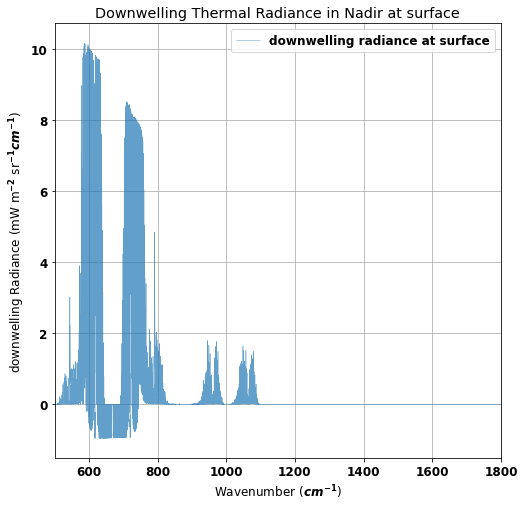

In [626]:
print('test')

plt.figure(figsize = (8,8))
plt.plot(nu_,1e3*(Surface_Down - Surface_Down_pre),label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.legend(loc=0)
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance (mW m$^{-2}$ sr$^{-1} cm^{-1}$)')
plt.xlim((500,1800))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()

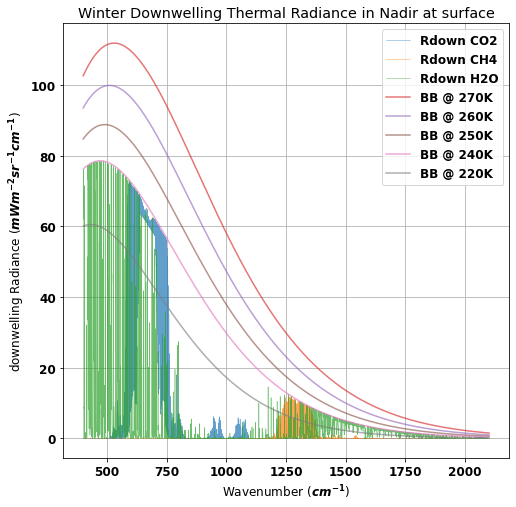

In [627]:
plt.figure(figsize = (8,8))
plt.plot(nu_, 1e3*Surface_Down_CO2,label='Rdown CO2', alpha=0.7 ,linewidth = 0.5)
plt.plot(nu_, 1e3*Surface_Down_CH4,label='Rdown CH4', alpha=0.7 ,linewidth = 0.5)
plt.plot(nu_, 1e3*Surface_Down_H2O,label='Rdown H2O', alpha=0.7 ,linewidth = 0.5)

# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

# plt.xlim((491,1799))
# plt.xlim((650,700))
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance ($mW m^{-2} sr^{-1} cm^{-1}$)')
# plt.xlim((4,30))
plt.title('Winter Downwelling Thermal Radiance in Nadir at surface')
plt.grid()
# plt.savefig('figs/christian_update_9_14/Rdown_gas_components_zoom.png', dpi = 300)

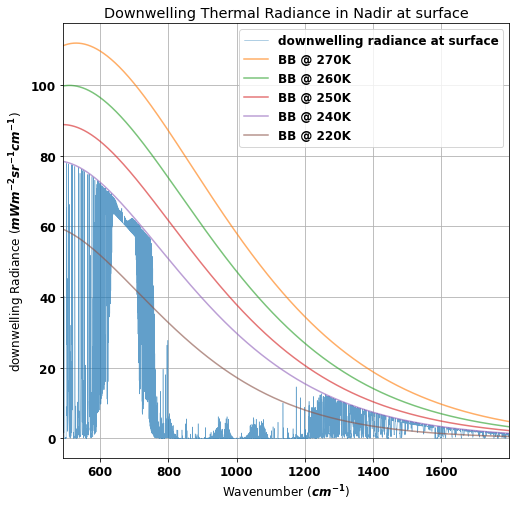

In [388]:
plt.figure(figsize = (8,8))
plt.plot(nu_, 1e3*Surface_Down_dCH4,label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

plt.xlim((491,1799))
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance ($mW m^{-2} sr^{-1} cm^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(nu_, 1e3*Surface_Down,label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

plt.xlim((491,1799))
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance ($mW m^{-2} sr^{-1} cm^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()

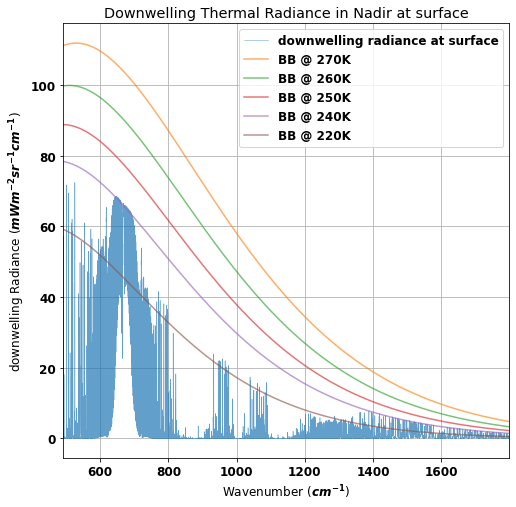

In [344]:
plt.figure(figsize = (8,8))
plt.plot(nu_, 1e3*Surface_Down,label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

plt.xlim((491,1799))
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance ($mW m^{-2} sr^{-1} cm^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()
# plt.savefig(save_figs_rel_dir + 'black_body_curves/' + 'summit_greenland_7_1_22_30.png', dpi = 300)

Text(0.5, 1.0, 'Downwelling Thermal Radiance in Nadir at surface')

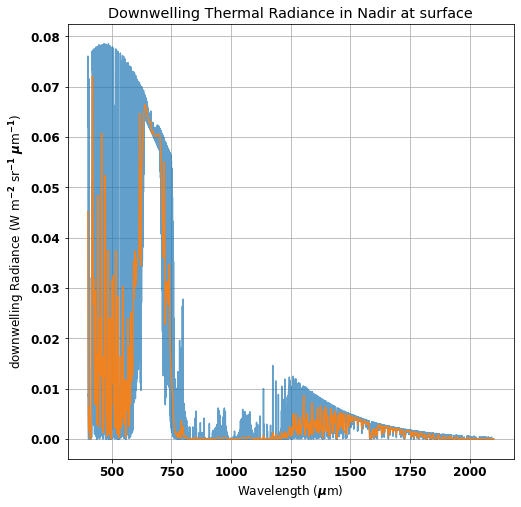

In [24]:
plt.figure(figsize = (8,8))
plt.plot(nu_,Surface_Down,label='downwelling radiance at surface', alpha=0.7)
plt.plot(nu_,gaussian_filter1d(Surface_Down,100),label='downwelling radiance at surface', alpha=0.9)
# plt.plot(wl_nu*1e6,gaussian_filter1d(Surface_Down_dH2O,200),label='downwelling radiance at surface', alpha=0.9)
plt.grid()
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')

In [44]:
# plt.plot(T_local)
# plot_profile(p_prof, q_local, newfig_bool = False, xlabel= 'Specific Humidity')
# plt.ylim([p_full.max(), 10000])

(64865.88, 10000)

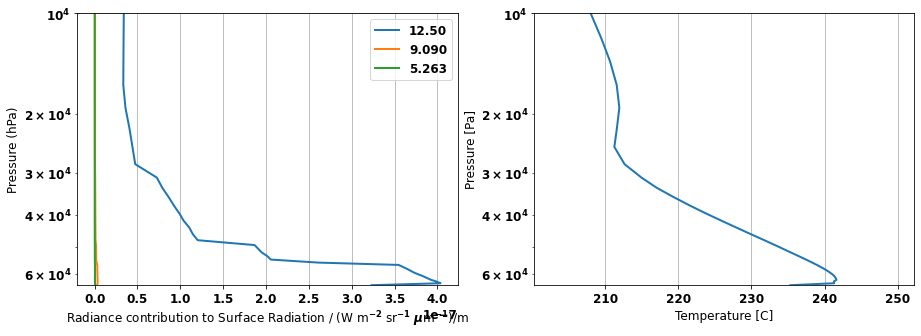

In [25]:
# fig, ax = plt.subplots(1,2)
i1, i2, i3 = 40000, 70000, 150000
plt.figure(figsize = (15,5))
plt.subplot(121)
plot_profile(p_prof, np.mean(Rdown[i1,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i1]*1e6)[:5])
plot_profile(p_prof, np.mean(Rdown[i2,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i2]*1e6)[:5])
rr = plot_profile(p_prof, np.mean(Rdown[i3,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i3]*1e6)[:5])

plt.xlabel('Radiance contribution to Surface Radiation / (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)/m')
plt.ylabel('Pressure (hPa)')
plt.ylim([p_prof.max(), 10000])
plt.legend()


plt.subplot(122)
plot_profile(p_prof, T_prof, newfig_bool = False)
# plot_profile(p_full, q_local, newfig_bool = False)
plt.ylim([p_prof.max(), 10000])

## Make pdf of downwelling radiation

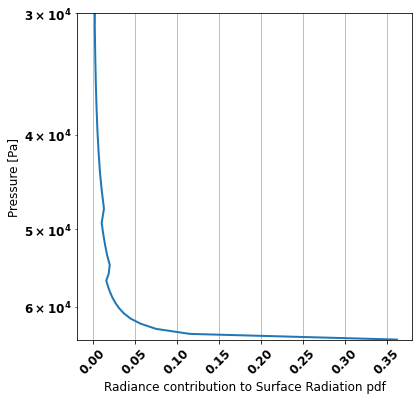

In [43]:
# plt.plot(Rdown[100000,:])
Rdown_pdf =  Rdown.sum(axis =0)
Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
plot_profile(p_prof, Rdown_pdf, min_pres = 3e4, 
             xlabel = 'Radiance contribution to Surface Radiation pdf',
             rotation = 45)

In [49]:
# plt.plot(Rdown[10,:][::-1]/dz_prof[::-1], np.cumsum(tau_co2[10,:][::-1]),label='AMSU-4')

# plt.legend(loc=0)
# # plt.ylim((10,0))
# plt.xlabel('Radiance contribution to TOA / (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)/m')
# plt.ylabel(r'$\tau$')

In [24]:
# tau matrix calculation (old)
tau_matrix = tau_co2[:,::-1].copy()
# tau_matrix = tau_co2_pre[:,::-1].copy()
# tau_matrix = tau_ch4[:,::-1].copy()
# tau_matrix = tau_h2o[:,::-1].copy()

# T_matrix = T[:,::-1]
# dT = np.diff(T_matrix, axis = 1)

tau_tolerance = 0.03
N_ks = tau_matrix .shape[0]
tau_matrix_cumsum = np.cumsum(tau_matrix, axis = 1)
# tau_wl = np.zeros((N_ks,1))
# dT_dz = np.zeros((N_ks,1))
tau_wl = np.zeros((N_ks,))
dT_dz = np.zeros((N_ks,))
for k_i in range(N_ks):
    tau_cumsum_z = tau_matrix_cumsum[k_i,:]
    tau_1_index = np.where((tau_cumsum_z - 1) > tau_tolerance)[0]
    if tau_1_index.size == 0:
        tau_wl[k_i] = np.nan
        dT_dz[k_i] = np.nan
        
    else:
        if len(tau_1_index) > 1:
            tau_1_index = tau_1_index[0]
        tau_wl[k_i] = p_prof[::-1][tau_1_index]
        # compute derivatives correctly 
#         dT_dz[k_i] = (T_prof[::-1][tau_1_index] - T_prof[::-1][tau_1_index + 1])/dz_prof[::-1][tau_1_index]
        # derivative with spline object
        dT_dz[k_i]  = interp_prof[-1](tau_wl[k_i],1)
#         break

NameError: name 'interp_prof' is not defined

In [744]:
def interpolate_profile(p_prof, 
                        var_prof, 
                        p_interp_grid, 
                        method = 'CubicSpline',
                        return_interp_obj = False):
    '''
    Interpolate profile to given pressure grid. 
    
    Args
    -----
    p_prof - np.array
        pressure profile 
    var_prof - np.array
        profile of variable to interpolate
    method - str {'CubicSpline','Linear'}
        interpolation method to use
        
    return_interp_obj - bool
        if True, return scipy.interpolate object along with profile
        
        
    Returns
    -------
    (p_interp_grid, var_prof_interpolated) - Profile interpolated to p_interp_grid
    
    '''
    # ensure coords are increasing 
    reversed_coords = False
    if (p_prof[1] < p_prof[0]) & \
       (var_prof[1] < var_prof[0]):
#        (p_interp_grid[1] < p_interp_grid[0]):
#         print('here')
        p_prof = p_prof[::-1]
        var_prof = var_prof[::-1]
        reversed_coords = True
        
#     return (p_prof, var_prof)
    if method == 'CubicSpline':
        interp_obj = CubicSpline(p_prof,var_prof, bc_type = 'natural')
        var_prof_interpolated = interp_obj(p_interp_grid)
    
    if method == 'Linear':
        interp_obj = interp1d(p_prof,var_prof, bounds_error = False)
        var_prof_interpolated = interp_obj(p_interp_grid)
        
#     if reversed_coords: 
#         var_prof_interpolated = var_prof_interpolated[::-1]
    if return_interp_obj:
        return (p_interp_grid, var_prof_interpolated, interp_obj)
    else:
        return (p_interp_grid, var_prof_interpolated)

In [745]:
# interpolate T vs. pressure (to find dT/dz @ tau = 1)
# interpolate from bottom up
z_prof = np.cumsum(dz_prof[::-1])
T_prof_incr = T_prof[::-1]

bottom_lapse_rate = (T_prof_incr[1] - T_prof_incr[0])/(z_prof[1] - z_prof[0])

# need a level at surface (z=0) to perform integration
z_prof_0 = np.append(np.array([0]),z_prof)
# T_prof_0 = np.append(np.array(T_prof_incr[0]),T_prof_incr)

T_prof_0 = np.append(np.array(T_prof_incr[0] - bottom_lapse_rate * (z_prof[0])),T_prof_incr)

interp_prof = interpolate_profile(z_prof_0,
                    T_prof_0,
#                     T_prof_incr,
#                     p_interp_grid = np.linspace(z_prof.min(), z_prof.max(), 1000),
                    p_interp_grid = np.linspace(0, z_prof.max(), 1000),
                    return_interp_obj=True)

In [726]:
z_prof

array([  103.79053,   186.8587 ,   270.9213 ,   356.36795,   442.8218 ,
         530.2881 ,   619.02625,   708.9948 ,   799.9805 ,   891.99243,
         985.2462 ,  1079.7759 ,  1208.0842 ,  1371.2728 ,  1537.6797 ,
        1709.526  ,  1885.1558 ,  2064.7427 ,  2343.5156 ,  2636.4028 ,
        2940.0542 ,  3262.8867 ,  3602.221  ,  3964.73   ,  4353.081  ,
        4777.6206 ,  5239.195  ,  5947.377  ,  6707.297  ,  7533.0503 ,
        8465.92   ,  9468.764  , 10467.258  , 11459.993  , 12446.152  ,
       13426.309  , 14412.538  , 15405.465  , 16406.121  , 17415.56   ,
       18434.744  , 19472.217  , 20529.365  , 21608.166  , 22711.633  ,
       23840.818  , 24998.76   , 26186.682  , 27418.803  , 28700.105  ,
       30029.764  , 31409.525  , 32836.38   , 34312.45   , 35847.312  ,
       37445.418  , 39104.62   , 40822.105  , 42591.14   , 44422.855  ,
       46298.36   , 48210.68   , 50162.477  , 52154.832  , 54197.754  ,
       56263.45   , 58316.547  , 60399.63   , 62620.035  , 65132

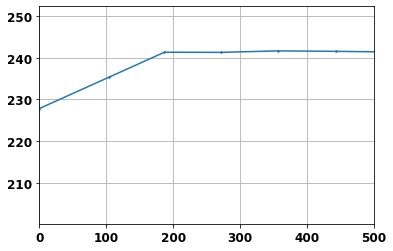

In [746]:
plt.plot(z_prof_0, T_prof_0, '.-', markersize= 3)
# plt.xlim([0, 1000])
plt.xlim([0,500])
plt.grid()

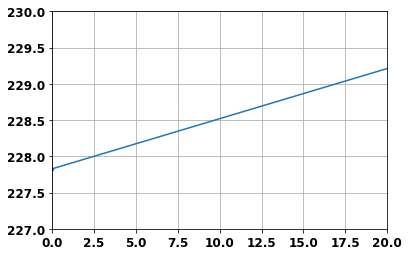

In [756]:
plt.plot(interp_prof[0], interp_prof[1], '.-', markersize= 5)
plt.ylim([227, 230])
plt.xlim([0,20])
plt.grid()

In [749]:
interp_prof[-1]

(0.0, 20.0)

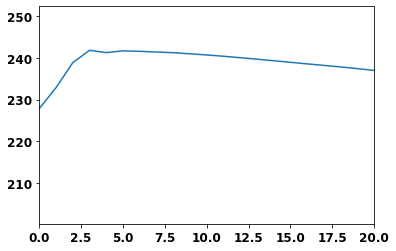

In [761]:
plt.plot(interp_prof[-1](np.linspace(0, z_prof.max(), 1000), nu = 0))
# plt.ylim([-0.01, 0.005])
plt.xlim([0,20])

In [688]:
%%time
# tau matrix calculation (new)
tau_matrix = tau_co2[:,::-1].copy()
# tau_matrix =  tau_co2.copy()
# tau_matrix = tau_co2_pre[:,::-1].copy()
# tau_matrix = tau_ch4[:,::-1].copy()
# tau_matrix = tau_h2o[:,::-1].copy()


N_ks = tau_matrix.shape[0]
tau_matrix_cumsum = np.cumsum(tau_matrix, axis = 1)

# add zero column to represent tau @ surface
zero_col = np.zeros(tau_matrix.shape[0]).reshape((tau_matrix.shape[0],1))
tau_matrix_cumsum = np.concatenate((zero_col,  tau_matrix_cumsum), axis = 1)

# cumsum_tau_2dinterp_obj = interp2d(z_prof, nu_, tau_matrix_cumsum)

tau_wl = np.zeros((N_ks,))
dT_dz = np.zeros((N_ks,))
# p_interp_grid_tau = np.linspace(1e3, p_prof.max(), 500)
# cumsum(tau) grid to interp to
p_interp_grid_tau = np.linspace(0, 5, 1000)
for k_i in range(N_ks):
# for k_i in range(24999,25000):
    tau_cumsum_z = tau_matrix_cumsum[k_i,:]
    # interpolate cumsum(tau) vs. pressure (to find tau = 1)
    interp_tau_cumsum = interpolate_profile(tau_cumsum_z,
                    z_prof_0, 
                    method = 'Linear',
                    p_interp_grid = p_interp_grid_tau,
                    return_interp_obj=True)
    
    
    z_at_tau_1 = interp_tau_cumsum[-1](1.0)
    # interp to pressure where tau = 1
    tau_wl[k_i] = interp_tau_cumsum[-1](1.0)
#     tau_wl[k_i] = cumsum_tau_2dinterp_obj(z_at_tau_1, nu_[k_i])
        
    dT_dz[k_i]  = interp_prof[-1](tau_wl[k_i], nu = 1)


CPU times: user 15.6 s, sys: 515 ms, total: 16.1 s
Wall time: 16.2 s


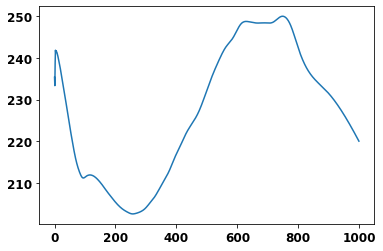

In [593]:
# z_at_tau_1
plt.plot(interp_prof[1])



In [590]:
z_prof

array([  103.79053,   186.8587 ,   270.9213 ,   356.36795,   442.8218 ,
         530.2881 ,   619.02625,   708.9948 ,   799.9805 ,   891.99243,
         985.2462 ,  1079.7759 ,  1208.0842 ,  1371.2728 ,  1537.6797 ,
        1709.526  ,  1885.1558 ,  2064.7427 ,  2343.5156 ,  2636.4028 ,
        2940.0542 ,  3262.8867 ,  3602.221  ,  3964.73   ,  4353.081  ,
        4777.6206 ,  5239.195  ,  5947.377  ,  6707.297  ,  7533.0503 ,
        8465.92   ,  9468.764  , 10467.258  , 11459.993  , 12446.152  ,
       13426.309  , 14412.538  , 15405.465  , 16406.121  , 17415.56   ,
       18434.744  , 19472.217  , 20529.365  , 21608.166  , 22711.633  ,
       23840.818  , 24998.76   , 26186.682  , 27418.803  , 28700.105  ,
       30029.764  , 31409.525  , 32836.38   , 34312.45   , 35847.312  ,
       37445.418  , 39104.62   , 40822.105  , 42591.14   , 44422.855  ,
       46298.36   , 48210.68   , 50162.477  , 52154.832  , 54197.754  ,
       56263.45   , 58316.547  , 60399.63   , 62620.035  , 65132

(0.0, 10.0)

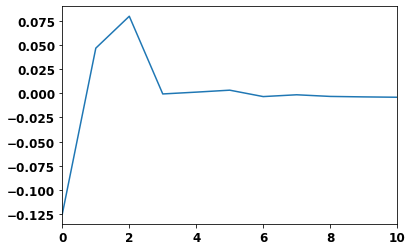

In [594]:
plt.plot(interp_prof[-1](interp_prof[0], nu = 1))
# plt.ylim([-0.01, 0.005])
plt.xlim([0,10])

(23000.0, 25000.0)

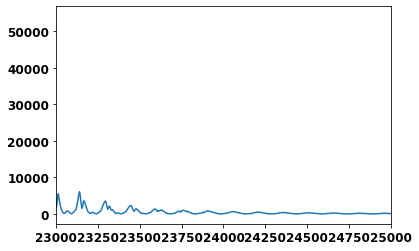

In [705]:
plt.plot(tau_wl)
plt.xlim([23000, 25000])
# plt.ylim([0,10000])

In [549]:
dT_dz[k_i]

0.17418076062102703

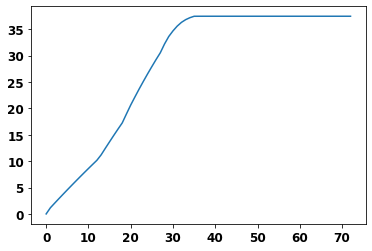

In [544]:
# plt.plot(z_prof[::-1])
# z_at_tau_1
plt.plot(tau_cumsum_z)
# plt.axis([0,10,0,10])

In [451]:
plt.plot(tau_cumsum_z[24999,:])

IndexError: too many indices for array

(0.0, 30000.0)

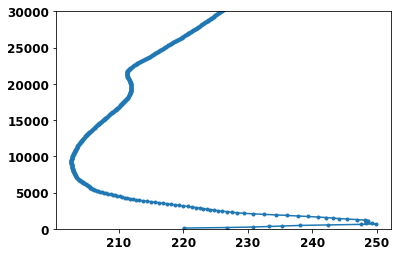

In [441]:
# interp_tau_cumsum
# plot_profile(p_prof[::-1], tau_cumsum_z)
# plot_profile(interp_prof[0], interp_prof[1])
plt.plot(interp_prof[1],interp_prof[0], '.-')
plt.ylim(0, 30000)
# plot_profile(interp_tau_cumsum[0], interp_tau_cumsum[1])

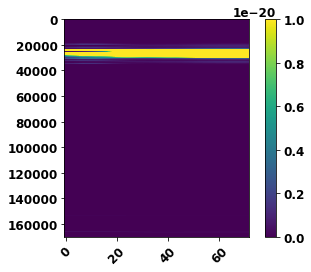

In [440]:

# plt.pcolormesh(nu_, p_prof , cs_matrix_co2.T, vmax = 10**-20)
plt.imshow(cs_matrix_co2,  vmax = 10**-20)
plt.gca().set_aspect(0.0005)
# plt.gca().invert_yaxis()
# plt.xlim([650, 700])
plt.xticks(rotation = 45)
plt.colorbar()

In [287]:
# p_prof

In [407]:
# plt.gca().invert_yaxis()
# plt.pcolormesh(nu_, p_prof , cs_matrix_co2.T, vmax = 10**-18)
# plt.xlim([660, 690])
# # plt.gca().invert_yaxis()
# plt.xticks(rotation = 45)
# plt.colorbar()

In [75]:
cs_matrix_co2[:,::-1]

(170000, 72)

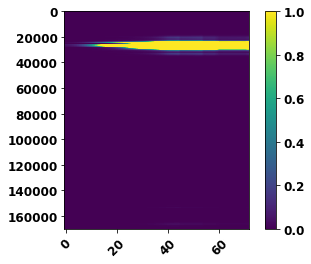

In [423]:
# plt.pcolormesh(nu_, p_prof, vmax = 2)
plt.imshow(tau_co2, vmax = 1)
plt.gca().set_aspect(0.0005)
# plt.xlim([660, 690])
# plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.colorbar()

(20000.0, 40000.0)

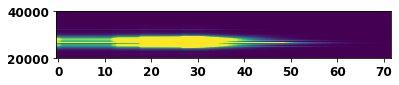

In [294]:
plt.imshow(tau_matrix, vmax = 10)
plt.gca().set_aspect(0.0005)
plt.ylim([20000, 40000])

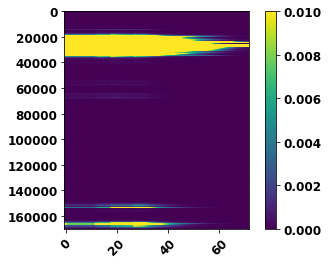

In [439]:
# interp_tau_cumsum
# p_prof
# plt.pcolormesh(nu_, p_prof , tau_matrix.T, vmax = 2)
plt.imshow(tau_matrix, vmax = 0.01)
plt.gca().set_aspect(0.0005)
# plt.xlim([660, 690])
# plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.colorbar()

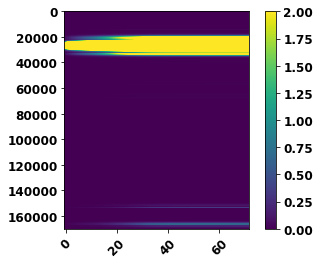

In [436]:
# interp_tau_cumsum[-1]
plt.imshow(tau_matrix_cumsum, vmax = 2)
# plt.pcolormesh(nu_, p_prof , tau_matrix_cumsum.T , vmax = 15)
plt.gca().set_aspect(0.0005)
    
# plt.gca().invert_yaxis()
# plt.xlim([650, 700])
plt.xticks(rotation = 45)
plt.colorbar()

In [312]:
# VCD_dry_prof

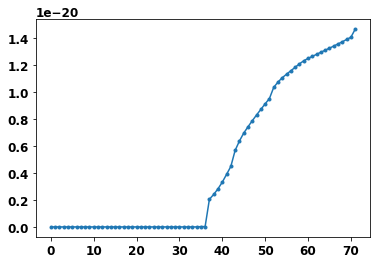

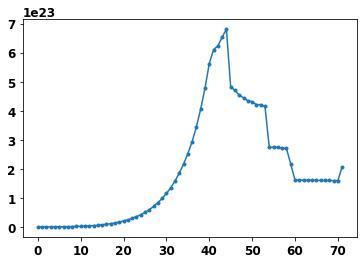

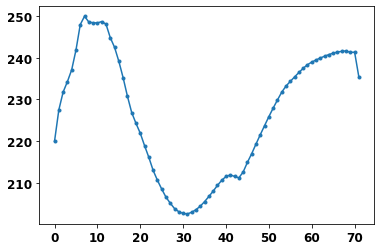

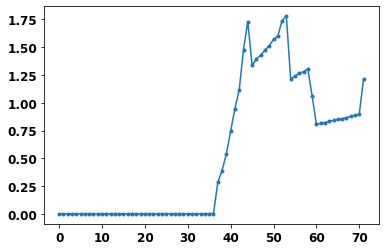

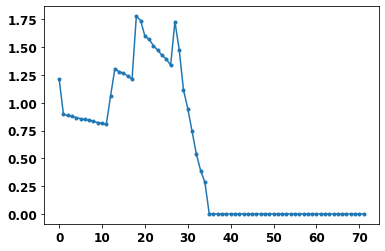

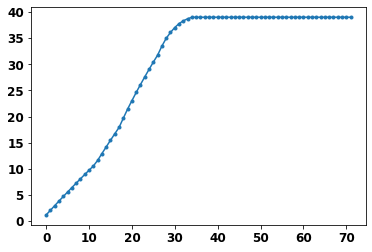

In [400]:
# tau_wl_co2_400 = tau_wl.copy()
# tau_wl_co2_270 = tau_wl.copy()



ii = 25000

plt.figure()
plt.plot(cs_matrix_co2[ii,:], '.-')

plt.figure()
plt.plot(VCD_dry_prof, '.-')

plt.figure()
plt.plot(T_prof, '.-')

plt.figure()
plt.plot(tau_co2[ii,:], '.-')

plt.figure()
plt.plot(tau_matrix[ii,:], '.-')

plt.figure()
plt.plot(tau_matrix_cumsum[ii,:],'.-')
# plt.xlim([0,2])
# plt.ylim([0,2])

In [239]:
tau_matrix_cumsum.T.shape
# ignore_inds = 0
# ave_emis_pres  = np.nansum((Surface_Down[ignore_inds:] *
#                             tau_wl_co2_400[ignore_inds:])/np.sum(Surface_Down[ignore_inds:]))

(72, 170000)

In [60]:
# np.nanmean(tau_wl_co2_400)
# plt.plot(wl_nm, Surface_Down)
# plt.xlim([5,30])


In [244]:
# %run simulate_radiances_utils.py
# time_i
# dT_dz

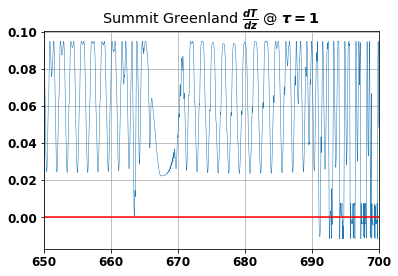

In [738]:
# plt.figure(figsize = (8,8))

plt.title(r'Summit Greenland $\frac{dT}{dz}$ @ $\tau = 1$')
# plt.xlabel(r'Wavenumber $\k $')
plt.plot(nu_, dT_dz, linewidth = 0.5)
plt.axhline(y=0, color='r', linestyle='-')
# plt.xlim((12,18))
# plt.xlim([550, 800])
plt.xlim([650, 700])
# plt.ylim([-0.005, 0.005])
# plt.ylim([-4, 3])
plt.grid()
# plt.savefig(save_figs_rel_dir + 'emission_height_plots/summit_greenland_dT_dz_7_1_22_30.png', dpi = 300)


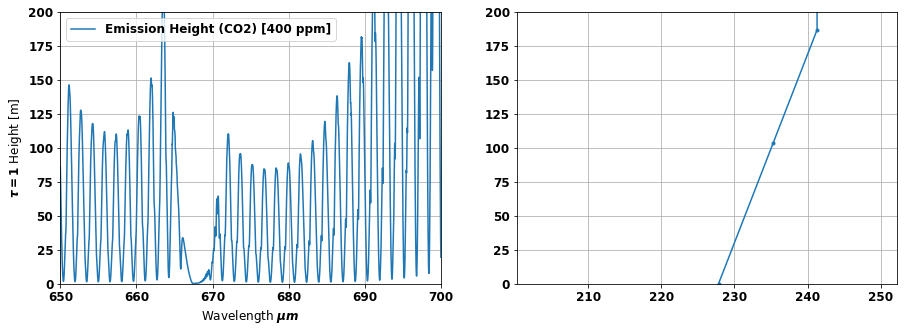

In [740]:
%run simulate_radiances_utils.py
wl_nm = wl_nu*1e6
plot_emission_height(nu_, tau_wl, T_prof_0, z_prof_0,
                     label = 'Emission Height (CO2) [400 ppm]',
                     xlim = [650,700], ylim = [0, 200])
#                      ylim = [p_prof.max(), 10**4])
#                     xlim = [wl_nm.min(), wl_nm.max()]
#                     ave_emmission_pres = np.nanmean(tau_wl_co2_400))
# plt.xlim((12,18))
# plt.savefig(save_figs_rel_dir + 'emission_height_plots/summit_greenland_emission_height_v_k_7_1_22_30.png', dpi = 300)

In [64]:
plt.plot(np.mean(Rdown, axis = 0))

NameError: name 'plt' is not defined

In [65]:
3e4

30000.0

In [66]:
# Surface_Down,tau_wl_co2_400

In [67]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof, 
                     ylim = [p_prof.max(), 10**4],
                     label = 'Emission Height (CO2) [270 ppm]')

NameError: name 'plot_emission_height' is not defined

In [68]:
plt.title('Change in CO2 emission height')
plt.xlabel(r'Wavelength $\mu m$')
plt.plot(wl_nu*1e6, tau_wl_co2_400 - tau_wl_co2_270, linewidth = 0.5)
plt.xlim((12.5,17.6))
plt.ylim([0, 15000])
plt.grid()

NameError: name 'plt' is not defined

In [69]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof,
                     ylim = [p_prof.max(), 10**3.5],
                     label = 'Emission Height (CH4)')

NameError: name 'plot_emission_height' is not defined

In [70]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof,
                     ylim = [p_prof.max(), 10**3.5],
                     label = 'Emission Height (H20)')

NameError: name 'plot_emission_height' is not defined